In [13]:
# %run "../../../common/0_notebooks_base_setup.py"    

---

<img src='../../../common/logo_DH.png' align='left' width=35%/>


#### Distribución Uniforme

##### Distribución Uniforme Discreta

Decimos que una variable aleatoria X tiene una distribución uniforme discreta sobre el conjunto de n números {x1, x2, ..., xn} si **la probabilidad de que X tome cualquiera de estos valores es constante 1/n**. 

Esta distribución surge en espacios de probabilidad **equiprobables**, esto es, en situaciones en donde tenemos n resultados diferentes y todos ellos tienen la misma probabilidad de ocurrir.

Se escribe 

$X \sim \text{unif}\{x_1, x_2, ..., x_n\} $

en donde el símbolo "$\sim$" se lee "se distribuye como" o "tiene una distribución".

La distribución de probabilidad de esa variable aleatoria es:

\begin{equation}
  f(x)=\begin{cases}
    1/n, & \text{si x = $x_1, x_2, ..., x_n$}\\
    0, & \text{en otro caso}.
  \end{cases}
\end{equation}


<!--![Image](img/prob_uniforme_discreta.png)-->
<img src="img/prob_uniforme_discreta.png" width="500"/>

\begin{equation}
n = 5  \text{    donde    } n = b − a + 1
\end{equation}

**Ejemplos**:

* X: puntuación en el lanzamiento de un dado regular

* X: resultado del lanzamiento de una moneda

* X: resultado de un juego de lotería


#### Distribución Uniforme Continua

Decimos que una variable aleatoria X tiene una distribución uniforme continua en el intervalo (a,b), donde a y b son números reales, si su función de densidad es 

\begin{equation}
  f_X(x)=\begin{cases}
    \frac{1}{b-a}, & \text{si $a \lt x \lt b$} \\
    0, & \text{en otro caso}.
  \end{cases}
\end{equation}

a y b son los parámetros de la distribución uniforme continua.

La distribución uniforme asigna probabilidad positiva constante y mayor a cero sólo a valores de la variable aleatoria en determinado rango.

\begin{equation}
  F_X(x)=\begin{cases}
    0, & \text{si $x \lt a$} \\
    \frac{x - a}{b - a}, & \text{si $a \le x \lt b$} \\
    1, & \text{si $x \ge b$}
  \end{cases}
\end{equation}


<img src="img/prob_uniforme_continua.png" width="500"/>

**Ejemplos**:

* Una llamada telefónica llegó a in conmutador en un tiempo, al azar, dentro de un período de 1 minuto. El conmutador estuvo ocupado durante 15 segundos en ese minuto. ¿Cuál es la probabilidad de que la llamada haya llegado mientras el conmutador no estuvo ocupado?

* Dos amigos deben encontrarse en una parada de colectivo entre las 9:00 y las 10:00. Cada uno esperará un máximo de 10 minutos. ¿Cuál es la probabilidad de que no se encuentren si el amigo1 llegará a las 9:30?

---

Vamos a ver ahora cómo generar datos con estas distibuciones de probabilidad.

Necesitamos un generador de números aleatorios, que expone métodos para generar números aleatorios con alguna distribución de probabilidad especificada. Construimos este generador de este modo `np.random.default_rng()`

https://docs.scipy.org/doc/numpy/reference/random/generator.html

Estas son las distribuciones de probabilidad disponibles:
https://docs.scipy.org/doc/numpy/reference/random/generator.html#distributions

Para generar datos con distribución **uniforme discreta** emplearemos el método `choice`

https://docs.scipy.org/doc/numpy/reference/random/generated/numpy.random.Generator.choice.html

Para generar datos con distribución **uniforme continua** emplearemos el método `uniform`

https://docs.scipy.org/doc/numpy/reference/random/generated/numpy.random.Generator.uniform.html#numpy.random.Generator.uniform


In [14]:
import numpy as np
random_generator = np.random.default_rng()
random_uniform_cont_data = random_generator.uniform(low = 3, high = 17, size = 1000)

possible_values = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
random_uniform_disc_data = random_generator.choice(possible_values, size = 1000)

Usando la función `distribution_plotter` vamos a graficar los valores generados

In [15]:
import seaborn as sns

def distribution_plotter(data, label, color = 'steelblue', 
                         bins='auto', binrange=None, binwidth=0.5 ):    
    sns.set(rc={"figure.figsize": (10, 7)})
    sns.set_style("white")    
    dist = sns.histplot(data, bins= bins, stat = 'density', kde = True, line_kws={'linewidth':5}, 
                        color = color, thresh = None, 
                        binrange = binrange, binwidth=binwidth)
    dist.set_title('Distribucion ' + label + '\n', fontsize=16)


[ 6.89805917 14.33043297  8.91315307 16.18584241  9.79965899 15.16635303
 15.39450205  6.06811205 15.03369611 14.30504583 11.19717894 15.56292093
 13.53522401  9.53694705  4.2220693  14.76203004  3.8113059  16.87362816
 16.5129957  15.41423823 13.12856602  3.01474247  7.58993593 14.75276458
 15.71891474 12.66790106  3.95065584  4.97915487 12.6394497  11.39964377
 10.29439972 11.84145133 10.06540749 16.26439639  3.56298971  3.11715976
 16.58516283  7.90387804 10.0793795  12.66315648 12.63268036 14.36579096
 12.49599286 12.82978054  8.63032314  9.34564774 11.48464094 10.69954136
  6.69584057 16.03482667 13.19315079  9.62220302  4.92110089 16.50793408
 15.3295653   7.17645601  5.52943672  6.31040061  7.0514587   4.37498124
  9.11187289  5.36400744 13.9787993   5.71020773  9.8131705  10.47552398
 11.58784726  7.43386037  5.61244584  8.24929869 11.08852858 13.07758945
 14.11663056 11.72150753 15.08181408  7.70032808 14.77269825 13.16340128
 12.64788406  8.87713908 10.18012241  4.97017811  8

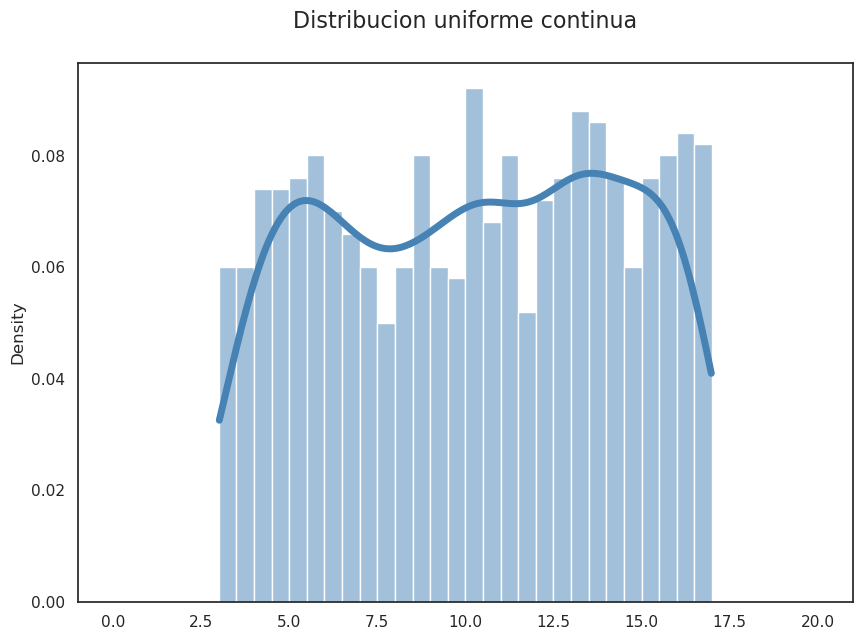

In [16]:
print(random_uniform_cont_data)
distribution_plotter(random_uniform_cont_data, "uniforme continua", binrange=(0,20))

[ 4 11 11 12  6  9  3 10  4  9  8  9  9  4  8 16  5 11 11  3 11 16  9  5
 13  8 15 10  9 12 12  8 16  8 10 14 13 13 14  9 15  6  5 16 14 13 13  6
  9 16  5 10 13 11 16 12  3  8 12 16  6 13 15 10 14 11 14  5  7 15 10  7
  6 14  7  3  6  4 11  9  9 16  8  4  9  8  6 14  5  5  6 16  4 15 14 12
  5 14  9  6  4  4  3  3 11 14 16 10  7  8 12 14 15  3 11  4  3  5  9 13
  8  5  7 16 15 14 10  8  6 16 15 16  9  5 15 15 15  8  9  8  3  8  9 13
  5  5 11  7  7 14 11  8  9  8  7  8 12 13  9  4  3 16 16 10 10 14  8 10
 16 15  8  4  4  7  9  3  8 14 12  7 10 16  5  7 11 10  4 13 12  7  6  8
  8  9 15  6  4  6 12  5  6 12  9  4 15  5 14  4  6 15 11 13  4 15  9  8
  8  4  7  4 16 13 16 15  5 12 11  4  8 12  3 11 11 16  7  3 16 13 12 15
  4  4 14  3 12  4 15 16  7 15  8  6  3 13  8 10 12  8  8  8 12 16 12  7
  3  9  4 15 15 16 16  8  8  9  9 10 15 13 14 13 12  3  5  9 16  5  9 14
 16 12 16 14  6  9 13 14  8 13 11 14  9 15  9  4 10  9  3  4  8  9 15  5
 16 10 14 16  5  6 11 16  5  6  5 11 16 14 11  7  3

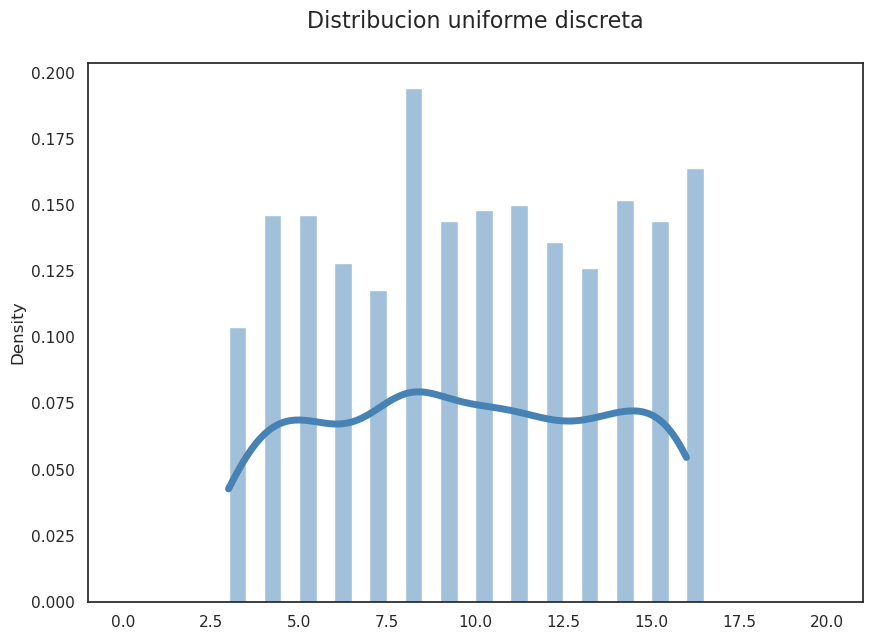

In [17]:
print(random_uniform_disc_data)

distribution_plotter(random_uniform_disc_data, "uniforme discreta", bins=possible_values, binrange=(0,20))

<div id="caja1" style="float:left;width: 100%;">
  <div style="float:left;width: 15%;"><img src="../../../common/icons/para_seguir_pensando.png" style="align:left"/> </div>
  <div style="float:left;width: 85%;"><label>¿Estas distribuciones se parecen?</label></div>
</div>

<div id="caja2" style="float:left;width: 100%;">
  <div style="float:left;width: 15%;"><img src="../../../common/icons/ponete_a_prueba.png" style="align:left"/> </div>
  <div style="float:left;width: 85%;"><label>Prueben ahora generando, 100, 1000, 10000 y 100000 datos y comparen los gráficos. ¿Qué pueden concluir?</label></div>
</div>



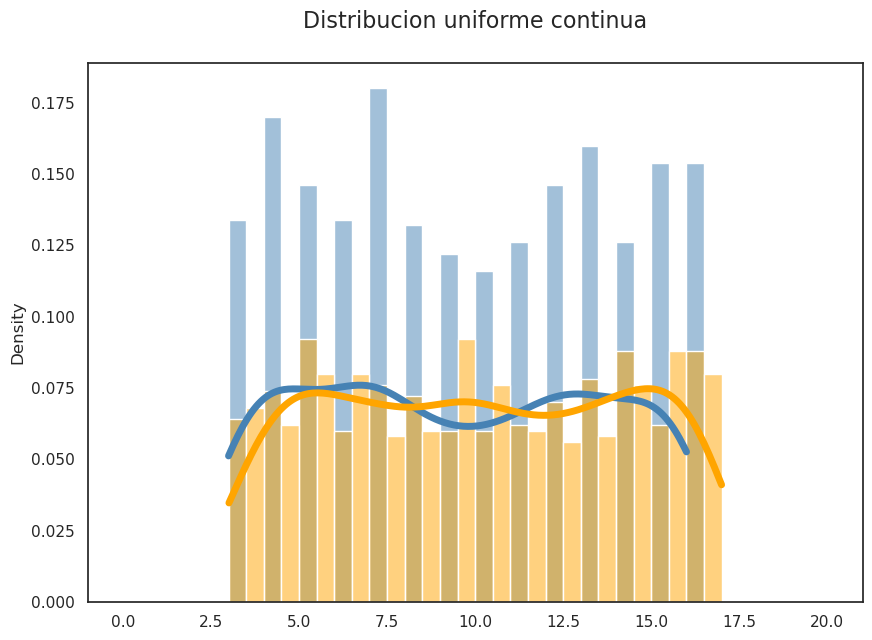

In [21]:
# modificar este valor:
size_sample = 1000

random_uniform_cont_data = random_generator.uniform(low = 3, high = 17, size = size_sample)

possible_values = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
random_uniform_disc_data = random_generator.choice(possible_values, size = size_sample)

distribution_plotter(random_uniform_disc_data, "uniforme discreta", binrange=(0,20))
distribution_plotter(random_uniform_cont_data, "uniforme continua", binrange=(0,20), color="orange")

#### Referencias

Gráficos: https://en.wikipedia.org/wiki/List_of_probability_distributions